**Import required libraries**

In [2]:
import intake
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import datetime
import numpy as np

**Open the NWM intake catalog**

In [3]:
catalog = intake.open_catalog('s3://nextgen-dmac-cloud-ingest/nwm_ll/nwm_intake.yml',storage_options={'anon':True})
(list(catalog))

['NWM_Best_CONUS_Short_Range',
 'NWM_Best_CONUS_Medium_Range',
 'NWM_Best_Alaska_Short_Range',
 'NWM_Best_Alaska_Medium_Range',
 'NWM_Best_Hawaii_Short_Range',
 'NWM_Best_PuertoRico_Short_Range']

In [4]:
## open short range dataset:
import xarray as xr

ds_sr_nc = xr.open_dataset("files/nwm.t23z.short_range.channel_rt.f001.conus.nc")
ds_sr_nc

<xarray.Dataset> Size: 155MB
Dimensions:         (time: 1, reference_time: 1, feature_id: 2776734)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-02-14
  * reference_time  (reference_time) datetime64[ns] 8B 2024-02-13T23:00:00
  * feature_id      (feature_id) int64 22MB 101 179 ... 1180001803 1180001804
Data variables:
    crs             |S1 1B ...
    streamflow      (feature_id) float64 22MB ...
    nudge           (feature_id) float64 22MB ...
    velocity        (feature_id) float64 22MB ...
    qSfcLatRunoff   (feature_id) float64 22MB ...
    qBucket         (feature_id) float64 22MB ...
    qBtmVertRunoff  (feature_id) float64 22MB ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v3.0
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2024-02-13_23:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2024-02-14_00:00:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

In [5]:
cat = catalog['NWM_Best_CONUS_Short_Range']
ds_sr = cat.to_dask()
ds_sr

<xarray.Dataset> Size: 97GB
Dimensions:         (feature_id: 2776734, time: 730, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 22MB 219043332211 201863462970 ... 0 0
    latitude        (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    longitude       (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-02-24T23:00:00
  * time            (time) datetime64[ns] 6kB 2024-02-25 ... 2024-03-26T09:00:00
Data variables:
    altitude        (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    crs             (time) object 6kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    link_id         (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    nudge           (time, feature_id) float64 16GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 16GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qBucket         (time, feature_id) float64 16GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 16GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    streamflow      (time, feature_id) float64 16GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    terminal_node   (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    to_link_id      (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    velocity        (time, feature_id) float64 16GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-02-25_00:00:00
    model_total_valid_times:    18
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    station_dimension:          feature_id
    stream_order_output:        1

In [6]:
# medium range conus:
ds_mr_nc = xr.open_dataset("files/nwm.t18z.medium_range_blend.channel_rt.f001.conus.nc")
ds_mr_nc

<xarray.Dataset> Size: 155MB
Dimensions:         (time: 1, reference_time: 1, feature_id: 2776734)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-02-13T19:00:00
  * reference_time  (reference_time) datetime64[ns] 8B 2024-02-13T18:00:00
  * feature_id      (feature_id) int64 22MB 101 179 ... 1180001803 1180001804
Data variables:
    crs             |S1 1B ...
    streamflow      (feature_id) float64 22MB ...
    nudge           (feature_id) float64 22MB ...
    velocity        (feature_id) float64 22MB ...
    qSfcLatRunoff   (feature_id) float64 22MB ...
    qBucket         (feature_id) float64 22MB ...
    qBtmVertRunoff  (feature_id) float64 22MB ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v3.0
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2024-02-13_18:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2024-02-13_19:00:00
    ...                         ...
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...
    model_configuration:        medium_range_blend

**Select the catalog entry to open**

In [7]:
cat = catalog['NWM_Best_CONUS_Medium_Range']
ds_mr = cat.to_dask()
ds_mr

<xarray.Dataset> Size: 126GB
Dimensions:         (feature_id: 2776734, time: 948, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 22MB 94572119683328 140393277451232 ... 0
    latitude        (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    longitude       (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-02-24T18:00:00
  * time            (time) datetime64[ns] 8kB 2024-02-24T19:00:00 ... 2024-04...
Data variables:
    altitude        (feature_id) float32 11MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    crs             (time) object 8kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    link_id         (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    nudge           (time, feature_id) float64 21GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 21GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qBucket         (time, feature_id) float64 21GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 21GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    streamflow      (time, feature_id) float64 21GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
    terminal_node   (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    to_link_id      (feature_id) float64 22MB dask.array<chunksize=(2776734,), meta=np.ndarray>
    velocity        (time, feature_id) float64 21GB dask.array<chunksize=(1, 2776734), meta=np.ndarray>
Attributes: (12/20)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-02-24_19:00:00
    model_total_valid_times:    240
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    station_dimension:          feature_id
    stream_order_output:        1

In [8]:
# short range alaska:
ds_ak_sr_nc = xr.open_dataset("files/nwm.t00z.short_range.channel_rt.f001.alaska.nc")
ds_ak_sr_nc

<xarray.Dataset> Size: 22MB
Dimensions:         (time: 1, reference_time: 1, feature_id: 391528)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-03-03T01:00:00
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-03
  * feature_id      (feature_id) int64 3MB 11 12 ... 75005400047364
Data variables:
    crs             |S1 1B ...
    streamflow      (feature_id) float64 3MB ...
    nudge           (feature_id) float64 3MB ...
    velocity        (feature_id) float64 3MB ...
    qSfcLatRunoff   (feature_id) float64 3MB ...
    qBucket         (feature_id) float64 3MB ...
    qBtmVertRunoff  (feature_id) float64 3MB ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v3.0
    featureType:                timeSeries
    proj4:                      +proj=stere +lat_0=90 +lat_ts=60 +lon_0=-135 ...
    model_initialization_time:  2024-03-03_00:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2024-03-03_01:00:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

In [9]:
cat = catalog['NWM_Best_Alaska_Short_Range']
ds_ak_sr = cat.to_dask()
ds_ak_sr

<xarray.Dataset> Size: 14GB
Dimensions:         (feature_id: 391528, time: 756, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 3MB 94572121722192 94572135211360 ... 0 0
    latitude        (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
    longitude       (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-02-25
  * time            (time) datetime64[ns] 6kB 2024-02-25T01:00:00 ... 2024-03...
Data variables:
    altitude        (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
    crs             (time) object 6kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    link_id         (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    nudge           (time, feature_id) float64 2GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 2GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qBucket         (time, feature_id) float64 2GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 2GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    streamflow      (time, feature_id) float64 2GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    terminal_node   (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    to_link_id      (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    velocity        (time, feature_id) float64 2GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-02-25_01:00:00
    model_total_valid_times:    15
    proj4:                      +proj=stere +lat_0=90 +lat_ts=60 +lon_0=-135 ...
    station_dimension:          feature_id
    stream_order_output:        1

In [10]:
# short range alaska:
ds_ak_mr_nc = xr.open_dataset("files/nwm.t00z.medium_range_blend.channel_rt.f001.alaska.nc")
ds_ak_mr_nc

<xarray.Dataset> Size: 22MB
Dimensions:         (time: 1, reference_time: 1, feature_id: 391528)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-03-03T01:00:00
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-03
  * feature_id      (feature_id) int64 3MB 11 12 ... 75005400047364
Data variables:
    crs             |S1 1B ...
    streamflow      (feature_id) float64 3MB ...
    nudge           (feature_id) float64 3MB ...
    velocity        (feature_id) float64 3MB ...
    qSfcLatRunoff   (feature_id) float64 3MB ...
    qBucket         (feature_id) float64 3MB ...
    qBtmVertRunoff  (feature_id) float64 3MB ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v3.0
    featureType:                timeSeries
    proj4:                      +proj=stere +lat_0=90 +lat_ts=60 +lon_0=-135 ...
    model_initialization_time:  2024-03-03_00:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2024-03-03_01:00:00
    ...                         ...
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...
    model_configuration:        medium_range_blend_alaska

In [11]:
cat = catalog['NWM_Best_Alaska_Medium_Range']
ds_ak_mr = cat.to_dask()
ds_ak_mr

<xarray.Dataset> Size: 18GB
Dimensions:         (feature_id: 391528, time: 948, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 3MB 94572122474304 94572208620432 ... 0 0
    latitude        (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
    longitude       (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-02-25
  * time            (time) datetime64[ns] 8kB 2024-02-25T01:00:00 ... 2024-04...
Data variables:
    altitude        (feature_id) float32 2MB dask.array<chunksize=(391528,), meta=np.ndarray>
    crs             (time) object 8kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    link_id         (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    nudge           (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qBucket         (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    streamflow      (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
    terminal_node   (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    to_link_id      (feature_id) float64 3MB dask.array<chunksize=(391528,), meta=np.ndarray>
    velocity        (time, feature_id) float64 3GB dask.array<chunksize=(1, 391528), meta=np.ndarray>
Attributes: (12/20)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-02-25_01:00:00
    model_total_valid_times:    240
    proj4:                      +proj=stere +lat_0=90 +lat_ts=60 +lon_0=-135 ...
    station_dimension:          feature_id
    stream_order_output:        1

In [12]:
# short range alaska:
ds_hi_sr_nc = xr.open_dataset("files/nwm.t00z.short_range.channel_rt.f00015.hawaii.nc")
ds_hi_sr_nc

<xarray.Dataset> Size: 764kB
Dimensions:         (time: 1, reference_time: 1, feature_id: 13637)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-03-03T00:15:00
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-03
  * feature_id      (feature_id) int64 109kB 800000002 800000003 ... 800023729
Data variables:
    crs             |S1 1B ...
    streamflow      (feature_id) float64 109kB ...
    nudge           (feature_id) float64 109kB ...
    velocity        (feature_id) float64 109kB ...
    qSfcLatRunoff   (feature_id) float64 109kB ...
    qBucket         (feature_id) float64 109kB ...
    qBtmVertRunoff  (feature_id) float64 109kB ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v3.0
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2024-03-03_00:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2024-03-03_00:15:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          900
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

In [13]:
cat = catalog['NWM_Best_Hawaii_Short_Range']
ds_hi_sr = cat.to_dask()
ds_hi_sr

<xarray.Dataset> Size: 1GB
Dimensions:         (feature_id: 13637, time: 1764, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 109kB 140393277453200 ... 140391306964432
    latitude        (feature_id) float32 55kB dask.array<chunksize=(13637,), meta=np.ndarray>
    longitude       (feature_id) float32 55kB dask.array<chunksize=(13637,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-02-25
  * time            (time) datetime64[ns] 14kB 2024-02-25T00:15:00 ... 2024-0...
Data variables:
    altitude        (feature_id) float32 55kB dask.array<chunksize=(13637,), meta=np.ndarray>
    crs             (time) object 14kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 109kB dask.array<chunksize=(13637,), meta=np.ndarray>
    link_id         (feature_id) float64 109kB dask.array<chunksize=(13637,), meta=np.ndarray>
    nudge           (time, feature_id) float64 192MB dask.array<chunksize=(1, 13637), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 192MB dask.array<chunksize=(1, 13637), meta=np.ndarray>
    qBucket         (time, feature_id) float64 192MB dask.array<chunksize=(1, 13637), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 192MB dask.array<chunksize=(1, 13637), meta=np.ndarray>
    streamflow      (time, feature_id) float64 192MB dask.array<chunksize=(1, 13637), meta=np.ndarray>
    terminal_node   (feature_id) float64 109kB dask.array<chunksize=(13637,), meta=np.ndarray>
    to_link_id      (feature_id) float64 109kB dask.array<chunksize=(13637,), meta=np.ndarray>
    velocity        (time, feature_id) float64 192MB dask.array<chunksize=(1, 13637), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-02-25_00:15:00
    model_total_valid_times:    192
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    station_dimension:          feature_id
    stream_order_output:        1

In [14]:
# short range alaska:
ds_pr_sr_nc = xr.open_dataset("files/nwm.t06z.short_range.channel_rt.f001.puertorico.nc")
ds_pr_sr_nc

<xarray.Dataset> Size: 785kB
Dimensions:         (time: 1, reference_time: 1, feature_id: 14017)
Coordinates:
  * time            (time) datetime64[ns] 8B 2024-03-03T07:00:00
  * reference_time  (reference_time) datetime64[ns] 8B 2024-03-03T06:00:00
  * feature_id      (feature_id) int64 112kB 800023730 800023731 ... 800042626
Data variables:
    crs             |S1 1B ...
    streamflow      (feature_id) float64 112kB ...
    nudge           (feature_id) float64 112kB ...
    velocity        (feature_id) float64 112kB ...
    qSfcLatRunoff   (feature_id) float64 112kB ...
    qBucket         (feature_id) float64 112kB ...
    qBtmVertRunoff  (feature_id) float64 112kB ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v3.0
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2024-03-03_06:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2024-03-03_07:00:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

In [15]:
cat = catalog['NWM_Best_PuertoRico_Short_Range']
ds_pr_sr = cat.to_dask()
ds_pr_sr

<xarray.Dataset> Size: 501MB
Dimensions:         (feature_id: 14017, time: 744, reference_time: 1)
Coordinates:
  * feature_id      (feature_id) int64 112kB 140393277453168 ... 0
    latitude        (feature_id) float32 56kB dask.array<chunksize=(14017,), meta=np.ndarray>
    longitude       (feature_id) float32 56kB dask.array<chunksize=(14017,), meta=np.ndarray>
  * reference_time  (reference_time) datetime64[ns] 8B 2024-02-25T06:00:00
  * time            (time) datetime64[ns] 6kB 2024-02-25T07:00:00 ... 2024-03...
Data variables:
    altitude        (feature_id) float32 56kB dask.array<chunksize=(14017,), meta=np.ndarray>
    crs             (time) object 6kB dask.array<chunksize=(1,), meta=np.ndarray>
    from_link_id    (feature_id) float64 112kB dask.array<chunksize=(14017,), meta=np.ndarray>
    link_id         (feature_id) float64 112kB dask.array<chunksize=(14017,), meta=np.ndarray>
    nudge           (time, feature_id) float64 83MB dask.array<chunksize=(1, 14017), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 83MB dask.array<chunksize=(1, 14017), meta=np.ndarray>
    qBucket         (time, feature_id) float64 83MB dask.array<chunksize=(1, 14017), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 83MB dask.array<chunksize=(1, 14017), meta=np.ndarray>
    streamflow      (time, feature_id) float64 83MB dask.array<chunksize=(1, 14017), meta=np.ndarray>
    terminal_node   (feature_id) float64 112kB dask.array<chunksize=(14017,), meta=np.ndarray>
    to_link_id      (feature_id) float64 112kB dask.array<chunksize=(14017,), meta=np.ndarray>
    velocity        (time, feature_id) float64 83MB dask.array<chunksize=(1, 14017), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                CF-1.6
    NWM_version_number:         v3.0
    TITLE:                      OUTPUT FROM NWM v3.0
    cdm_datatype:               Station
    code_version:               v5.3.0-alpha1
    dev:                        dev_ prefix indicates development/internal me...
    ...                         ...
    model_output_type:          channel_rt
    model_output_valid_time:    2024-02-25_07:00:00
    model_total_valid_times:    48
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    station_dimension:          feature_id
    stream_order_output:        1




&nbsp;
**Set the set the feature ID and time bounds to extract**

In [16]:
feature_id = 19020190088835
start_t='2024-02-23T13:00'
end_t = '2024-03-16T02:00'

#### Output the feature_id array subset for the netCDF sources:

In [18]:

feature_id_sr_nc = np.random.choice(ds_sr_nc.isel(time=0).coords['feature_id'], size=100)
feature_id_mr_nc = np.random.choice(ds_mr_nc.isel(time=0).coords['feature_id'], size=100)
feature_id_ak_sr_nc = np.random.choice(ds_ak_sr_nc.isel(time=0).coords['feature_id'], size=100)
feature_id_ak_mr_nc = np.random.choice(ds_ak_mr_nc.isel(time=0).coords['feature_id'], size=100)
feature_id_hi_sr_nc = np.random.choice(ds_hi_sr_nc.isel(time=0).coords['feature_id'], size=100)
feature_id_pr_sr_nc = np.random.choice(ds_pr_sr_nc.isel(time=0).coords['feature_id'], size=100)

print(f"feature_id_sr_nc: {feature_id_sr_nc}\n\nfeature_id_mr_nc: {feature_id_mr_nc}\n\nfeature_id_ak_sr_nc: {feature_id_ak_sr_nc} \
\n\nfeature_id_ak_mr_nc: {feature_id_ak_mr_nc}\n\nfeature_id_hi_sr_nc: {feature_id_hi_sr_nc}\n\nfeature_id_pr_sr_nc: {feature_id_pr_sr_nc}")

feature_id_sr_nc: [ 10053504   1936240  13635219  18869868  10125666   9503914   7559729
 167578326   7346379   9328704  14727334  20090162  23095900   5944089
  14623372  10062221   4531051   2923767  24433095   8319361  15710325
   7732053  11228082  13782454  20985543    849075  10434174  14208392
   3025646  18106856  22859007  13296230   8127015  14706200  22846555
  23352869  17477947  20930954   9799544  15216413  17514772  19550484
  21677304   1827560  22340191   3924503  24035628  20031981   8610203
  11286852  23838206  13136141  41028433  11630041  12721744  14681672
  11895602  13009196  15736295   1076715  17370038  11332523  10034516
   5543738  23706668  18545934  10518484   6848013   4506724  10563386
   8889872  23610690   3980260  10722312    653948   7049513   8627195
    370247   4453352  18393840  21903083  14098785  10300317   5308684
   6268974  19887933   4997621   4195450  17298448  23903531  18135354
   2431172   1024698   9991283   2009492  24398130  1915300

#### Output the feature_id array subset for the kerchunk aggregation sources:

This should yield similar results to the above (all feature_id values present in the collection arrays)

In [19]:
feature_id_sr = np.random.choice(ds_sr.isel(time=0).coords['feature_id'], size=100)
feature_id_mr = np.random.choice(ds_mr.isel(time=0).coords['feature_id'], size=100)
feature_id_ak_sr = np.random.choice(ds_ak_sr.isel(time=0).coords['feature_id'], size=100)
feature_id_ak_mr = np.random.choice(ds_ak_mr.isel(time=0).coords['feature_id'], size=100)
feature_id_hi_sr = np.random.choice(ds_hi_sr.isel(time=0).coords['feature_id'], size=100)
feature_id_pr_sr = np.random.choice(ds_pr_sr.isel(time=0).coords['feature_id'], size=100)

print(f"feature_id_sr: {feature_id_sr}\n\nfeature_id_mr: {feature_id_mr}\n\nfeature_id_ak_sr: {feature_id_ak_sr} \
\n\nfeature_id_ak_mr: {feature_id_ak_mr}\n\nfeature_id_hi_sr: {feature_id_hi_sr}\n\nfeature_id_pr_sr: {feature_id_pr_sr}")

feature_id_sr: [                   0                    0                    0
                    0                    0                    0
                    0                    0                    0
                    0                    0 -5643100855274592861
                    0                    0                    0
                    0                    0                    0
                    0                    0                    0
                    0                    0 -5715441028112669534
                    0                    0                    0
                    0                    0 -2821834278438394204
                    0                    0                    0
                    0  8824933712340741740                    0
                    0                    0                    0
                    0  6076007144493828166                    0
                    0                    0                    0
                    0    

### Plots of different forecast collections

First, assign a time range of a two week window from today's date for plotting:

In [20]:
# create a time window of +-1 week
start_t = datetime.datetime.now() - datetime.timedelta(days=7)
end_t = datetime.datetime.now() + datetime.timedelta(days=7)

# create a time window of +-1 day
#start_t = datetime.datetime.now() - datetime.timedelta(days=1)
#end_t = datetime.datetime.now() + datetime.timedelta(days=1)


Check a few random feature_id index values from CONUS Short and Medium range collections to verify valid feature_ids returned:

In [21]:
#feature_id = ds_sr.isel(time=0).coords['feature_id'].values[0]
feature_id = np.random.choice(ds_sr.isel(time=0).coords['feature_id'])

#print output:
print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")


start_t: 2024-03-18 12:37:34.162878, end_t: 2024-04-01 12:37:34.162918, feature_id: 7884511465445744991


In [22]:
#feature_id = ds_mr.isel(time=0).coords['feature_id'].values[0]
feature_id = np.random.choice(ds_mr.isel(time=0).coords['feature_id'])

#print output:
print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")


start_t: 2024-03-18 12:37:34.162878, end_t: 2024-04-01 12:37:34.162918, feature_id: 0


**NWM_Best_CONUS_Short_Range**, random feature_id:

In [ ]:
%%time

feature_id = np.random.choice(ds_sr.isel(time=0).coords['feature_id'])
ts_ds = ds_sr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

**NWM_Best_CONUS_Medium_Range**, random feature_id:

In [ ]:
%%time

feature_id = np.random.choice(ds_mr.isel(time=0).coords['feature_id'])
ts_ds = ds_mr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

**NWM_Best_PuertoRico_Short_Range**, random feature_id:

start_t: 2024-03-18 12:37:34.162878, end_t: 2024-04-01 12:37:34.162918, feature_id: 140391227082096


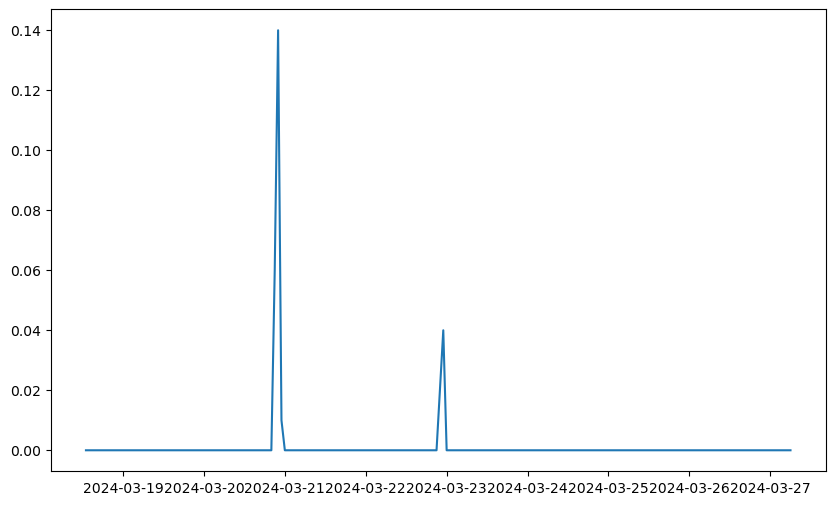

CPU times: user 832 ms, sys: 34.4 ms, total: 866 ms
Wall time: 16.2 s


In [26]:
%%time

feature_id = np.random.choice(ds_pr_sr.isel(time=0).coords['feature_id'])
ts_ds = ds_pr_sr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

start_t: 2024-03-18 12:37:34.162878, end_t: 2024-04-01 12:37:34.162918, feature_id: 140391225055696


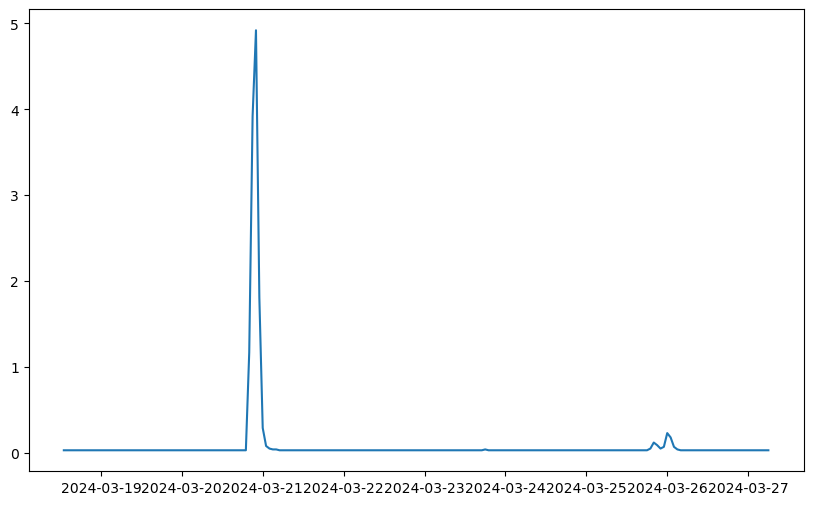

CPU times: user 783 ms, sys: 39.4 ms, total: 822 ms
Wall time: 11.4 s


In [24]:
%%time

feature_id = np.random.choice(ds_pr_sr.isel(time=0).coords['feature_id'])
ts_ds = ds_pr_sr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

**NWM_Best_Hawaii_Short_Range**, random feature_id:

start_t: 2024-03-18 12:37:34.162878, end_t: 2024-04-01 12:37:34.162918, feature_id: 140391306827968


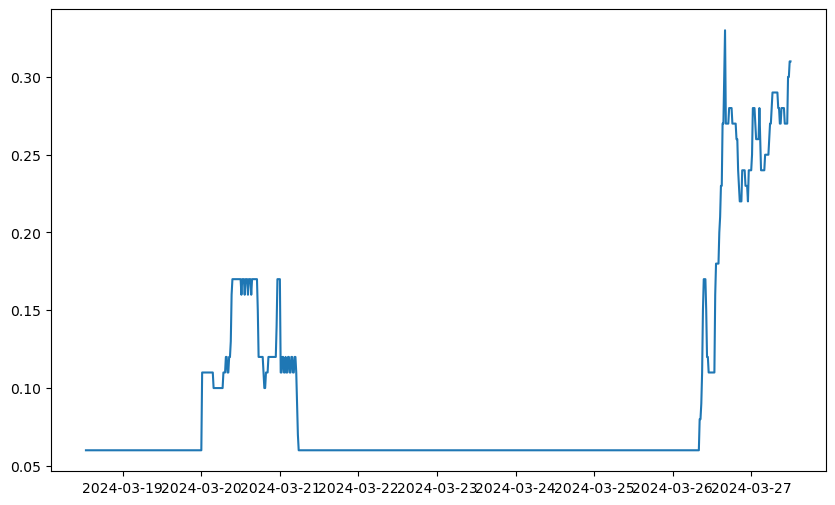

CPU times: user 3.01 s, sys: 153 ms, total: 3.16 s
Wall time: 58 s


In [29]:
%%time

feature_id = np.random.choice(ds_hi_sr.isel(time=0).coords['feature_id'])
ts_ds = ds_hi_sr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

**NWM_Best_Alaska_Short_Range**, random feature_id:

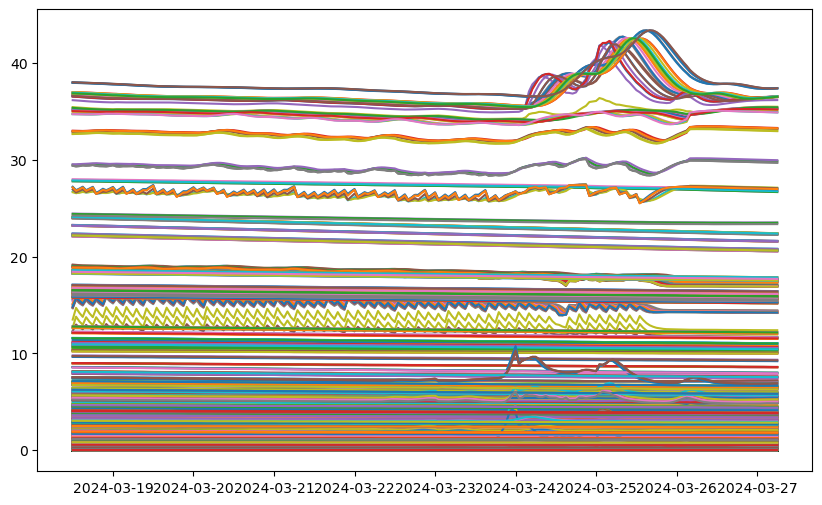

CPU times: user 1min 3s, sys: 1.32 s, total: 1min 4s
Wall time: 1min 11s


In [79]:
%%time

feature_id = np.random.choice(ds_ak_sr.isel(time=0).coords['feature_id'])
ts_ds = ds_ak_sr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")
plt.show()

### Original Plot

This is the equivalent of the plot code in the original notebook, with a different two week time window to match the above plots

&nbsp;

**Extract and plot the timeseries data**

start_t: 2024-03-18 11:48:52.769872, end_t: 2024-04-01 11:48:52.769913, feature_id: 0


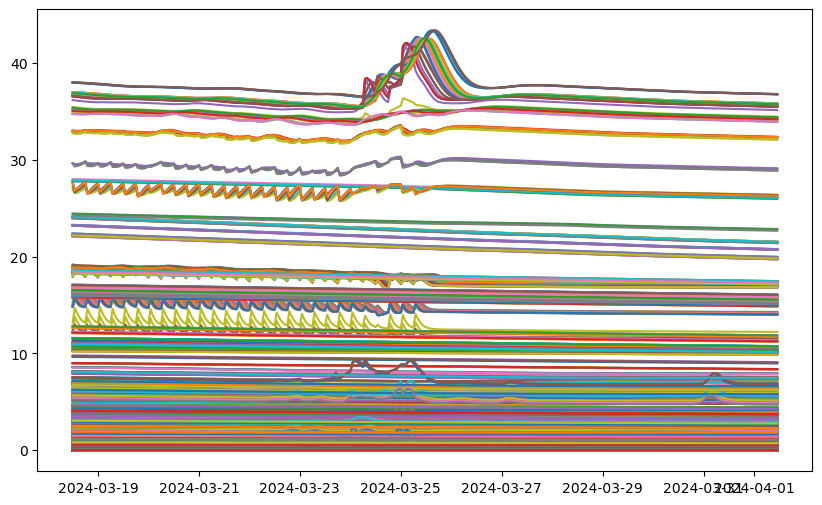

In [93]:
# use the pre-selected feature_id instead:

# this will select the first feature_id value at time slice 0:
#feature_id = ds_ak_mr.isel(time=0).coords['feature_id'].values[0]

# this will select the feature_id value at index -100 at time slice 0:
feature_id = ds_ak_mr.isel(time=0).coords['feature_id'].values[-100]

# this will use the hardcoded feature_id from the original notebook (sometimes errors out if not present):
#feature_id = ds_ak_mr.sel(feature_id=19020190088835).coords['feature_id'].values

#print output:
print(f"start_t: {start_t}, end_t: {end_t}, feature_id: {feature_id}")


ts_ds = ds_ak_mr.sel(time=slice(start_t, end_t),feature_id=feature_id)
plt.figure(figsize=(10,6))
plt.plot(ts_ds.time, ts_ds.streamflow[:])

plt.show()

### Testing 

Just some testing of xarray subset functions for the above slicing/subsetting/plotting tests:

In [17]:
# testing xarray functions............

#feature_id = 19020190088835
#start_t='2024-02-23T13:00'
#end_t = '2024-03-16T02:00'



# slice by first feature_id element:

# these functions slice by the first feature_id value, returning an xarray dataset with all times at the single feature_id index value
#feature_id = ds_mr.isel(feature_id=0)
#feature_id = ds_mr.isel(feature_id=0).coords['feature_id']

# to get the actual value of the feature_id coordinate here, we don't use array syntax, as it's a scalar:
feature_id = ds_mr.isel(feature_id=0).coords['feature_id'].values


# slice by first element of the time dimension:

# returns full xarray dataset:
#feature_id = ds_mr.isel(time=0)

# returns the feature_id coordinate xarray datarray:
#feature_id = ds_mr.isel(time=0).coords['feature_id']
feature_id = ds_mr.isel(time=0).coords['feature_id'].values

# returns the 0th feature_id coordinate value:
#feature_id = ds_mr.isel(time=0).coords['feature_id'].values[0]



# or, just select a feature_id (doesn't actually do anything just output the same value):

#feature_id = ds_sr.sel(feature_id=19020190088835)
#feature_id = ds_ak_mr.sel(feature_id=19020190088835).coords['feature_id'].values




# np random sample of 1000 feature_ids:
#feature_id_sr = np.random.choice(ds_sr.isel(time=0).coords['feature_id'], size=100)
feature_id = np.random.choice(ds_sr.isel(time=0).coords['feature_id'], size=100)
#feature_id = np.random.choice(ds_mr.isel(time=0).coords['feature_id'], size=100)
#feature_id = np.random.choice(ds_ak_sr.isel(time=0).coords['feature_id'], size=100)
#feature_id = np.random.choice(ds_ak_mr.isel(time=0).coords['feature_id'], size=100)
#feature_id = np.random.choice(ds_hi_sr.isel(time=0).coords['feature_id'], size=100)
#feature_id = np.random.choice(ds_pr_sr.isel(time=0).coords['feature_id'], size=100)

#print(feature_id_sr)
#print(feature_id)